<a href="https://colab.research.google.com/github/AlfiRam/Computer-Vision-X-Ray-Images-Classification/blob/main/CNN_Assignment_Muhammad_Alfi_Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting the Paths to their Corresponding Folders

In [ ]:
import os
import random
import shutil

random.seed(1)

positive_folder = '/content/drive/MyDrive/UNI/SEMESTER 4/comvis/COVID-19/Positif'
negative_folder = '/content/drive/MyDrive/UNI/SEMESTER 4/comvis/COVID-19/Negatif'

train_folder = '/content/drive/MyDrive/UNI/SEMESTER 4/comvis/COVID-19/Training'
test_folder = '/content/drive/MyDrive/UNI/SEMESTER 4/comvis/COVID-19/Testing'

In [ ]:
positive_images = os.listdir(positive_folder)
negative_images = os.listdir(negative_folder)

# Splitting the Dataset into Training and Testing Set with 8:2 Ratio

In [ ]:
num_positive_train = int(0.8 * len(positive_images))
num_negative_train = int(0.8 * len(negative_images))
num_positive_test = len(positive_images) - num_positive_train
num_negative_test = len(negative_images) - num_negative_train

# Creating the Training Set

In [ ]:
for folder in [train_folder + "/positive", train_folder + "/negative"]:
    os.makedirs(folder, exist_ok=True)

positive_train_images = random.sample(positive_images, num_positive_train)
for image in positive_train_images:
    shutil.copy(positive_folder + "/" + image, train_folder + "/positive")

negative_train_images = random.sample(negative_images, num_negative_train)
for image in negative_train_images:
    shutil.copy(negative_folder + "/" + image, train_folder + "/negative")

# Creating the Testing Set


In [ ]:
for folder in [test_folder + "/positive", test_folder + "/negative"]:
    os.makedirs(folder, exist_ok=True)

positive_test_images = [x for x in positive_images if x not in positive_train_images]
positive_test_images = random.sample(positive_test_images, num_positive_test)
for image in positive_test_images:
    shutil.copy(positive_folder + "/" + image, test_folder + "/positive")

negative_test_images = [x for x in negative_images if x not in negative_train_images]
negative_test_images = random.sample(negative_test_images, num_negative_test)
for image in negative_test_images:
    shutil.copy(negative_folder + "/" + image, test_folder + "/negative")

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

## Building the CNN

In [ ]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/UNI/SEMESTER 4/comvis/COVID-19/Checkpoints',
    monitor = 'val_accuracy',
    verbose = 1,
    save_best_only = True,
    mode = 'max')

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 7.9 MB/s eta 0:00:00


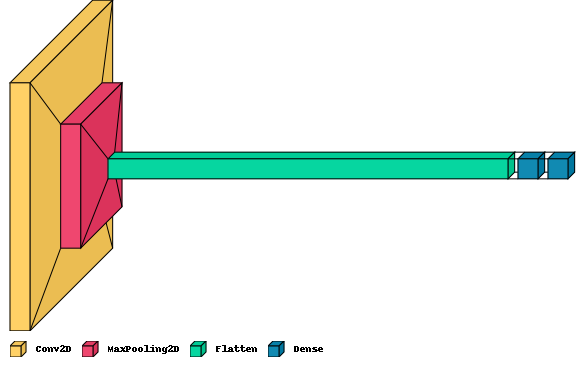

In [ ]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(classifier, legend=True)

## Fitting the CNN Into Images

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/UNI/SEMESTER 4/comvis/COVID-19/Training', target_size = (64,64), batch_size=31, class_mode='binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/UNI/SEMESTER 4/comvis/COVID-19/Testing', target_size=(64,64), batch_size=16, class_mode = 'binary')

Found 124 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


## Training the Model

In [ ]:
classifier.fit(training_set, steps_per_epoch = 4, epochs = 100, validation_data = test_set, validation_steps = 2, callbacks = [checkpoint_callback])

Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 3.4237 - accuracy: 0.5887
Epoch 1: val_accuracy improved from -inf to 0.37500, saving model to /content/drive/MyDrive/UNI/SEMESTER 4/comvis/COVID-19/Checkpoints


4/4 [==============================] - 16s 4s/step - loss: 3.4237 - accuracy: 0.5887 - val_loss: 2.4323 - val_accuracy: 0.3750
Epoch 2/100
4/4 [==============================] - ETA: 0s - loss: 1.6039 - accuracy: 0.3710
Epoch 2: val_accuracy did not improve from 0.37500
4/4 [==============================] - 15s 4s/step - loss: 1.6039 - accuracy: 0.3710 - val_loss: 0.7221 - val_accuracy: 0.3750
Epoch 3/100
4/4 [==============================] - ETA: 0s - loss: 0.7239 - accuracy: 0.5242
Epoch 3: val_accuracy improved from 0.37500 to 0.62500, saving model to /content/drive/MyDrive/UNI/SEMESTER 4/comvis/COVID-19/Checkpoints


4/4 [==============================] - 11s 3s/step - loss: 0.7239 - accuracy: 0.5242 - val_loss: 0.6786 - val_accuracy: 0.6250
Epoch 4/100
4/4 [==============================] - ETA: 0s - loss: 0.7253 - accuracy: 0.6290
Epoch 4: val_accuracy did not improve from 0.62500
4/4 [==============================] - 11s 3s/step - loss: 0.7253 - accuracy: 0.6290 - val_loss: 0.6704 - val_accuracy: 0.6250
Epoch 5/100
4/4 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.6290
Epoch 5: val_accuracy did not improve from 0.62500
4/4 [==============================] - 12s 4s/step - loss: 0.6920 - accuracy: 0.6290 - val_loss: 0.6436 - val_accuracy: 0.6250
Epoch 6/100
4/4 [==============================] - ETA: 0s - loss: 0.6753 - accuracy: 0.6290
Epoch 6: val_accuracy did not improve from 0.62500
4/4 [==============================] - 11s 3s/step - loss: 0.6753 - accuracy: 0.6290 - val_loss: 0.6561 - val_accuracy: 0.6250
Epoch 7/100
4/4 [==============================] - ETA: 0s -

4/4 [==============================] - 13s 4s/step - loss: 0.6341 - accuracy: 0.6613 - val_loss: 0.6235 - val_accuracy: 0.7188
Epoch 30/100
4/4 [==============================] - ETA: 0s - loss: 0.6257 - accuracy: 0.6855
Epoch 30: val_accuracy did not improve from 0.71875
4/4 [==============================] - 9s 2s/step - loss: 0.6257 - accuracy: 0.6855 - val_loss: 0.6202 - val_accuracy: 0.6250
Epoch 31/100
4/4 [==============================] - ETA: 0s - loss: 0.6253 - accuracy: 0.6694
Epoch 31: val_accuracy did not improve from 0.71875
4/4 [==============================] - 11s 3s/step - loss: 0.6253 - accuracy: 0.6694 - val_loss: 0.6179 - val_accuracy: 0.6250
Epoch 32/100
4/4 [==============================] - ETA: 0s - loss: 0.6197 - accuracy: 0.6935
Epoch 32: val_accuracy improved from 0.71875 to 0.75000, saving model to /content/drive/MyDrive/UNI/SEMESTER 4/comvis/COVID-19/Checkpoints


4/4 [==============================] - 13s 4s/step - loss: 0.6197 - accuracy: 0.6935 - val_loss: 0.6252 - val_accuracy: 0.7500
Epoch 33/100
4/4 [==============================] - ETA: 0s - loss: 0.6180 - accuracy: 0.7016
Epoch 33: val_accuracy did not improve from 0.75000
4/4 [==============================] - 11s 3s/step - loss: 0.6180 - accuracy: 0.7016 - val_loss: 0.6156 - val_accuracy: 0.7188
Epoch 34/100
4/4 [==============================] - ETA: 0s - loss: 0.6026 - accuracy: 0.7258
Epoch 34: val_accuracy did not improve from 0.75000
4/4 [==============================] - 13s 4s/step - loss: 0.6026 - accuracy: 0.7258 - val_loss: 0.6120 - val_accuracy: 0.7188
Epoch 35/100
4/4 [==============================] - ETA: 0s - loss: 0.6130 - accuracy: 0.6935
Epoch 35: val_accuracy did not improve from 0.75000
4/4 [==============================] - 12s 3s/step - loss: 0.6130 - accuracy: 0.6935 - val_loss: 0.6137 - val_accuracy: 0.7500
Epoch 36/100
4/4 [==============================] - ET

In [ ]:
classifier.evaluate(test_set)

2/2 [==============================] - 14s 12s/step - loss: 0.6861 - accuracy: 0.6562


[0.6860675811767578, 0.65625]

# Testing the Model - Positive Testing Set

In [ ]:
import keras.utils as image
import numpy as np
import os

test_folder = '/content/drive/MyDrive/UNI/SEMESTER 4/comvis/COVID-19/Testing/positive'
test_images = os.listdir(test_folder)

predictions = []
for test_image in test_images:
    img_path = os.path.join(test_folder, test_image)
    img = image.load_img(img_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result = classifier.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'positive'
    else:
        prediction = 'negative'
    predictions.append((test_image, result[0][0], prediction))

for prediction in predictions:
    print("\n".join(str(p) for p in prediction))
    print()

1/1 [==============================] - 0s 55ms/step
covid-19-pneumonia-8.jpg
0.0
negative

covid-19-caso-70-1-PA.jpg
1.0
positive

covid-19-pneumonia-40.jpg
1.0
positive

covid-19-pneumonia-49-day4.jpg
1.0
positive

covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-1.jpg
9.7046446e-05
negative

covid-19-pneumonia-34.png
4.0087702e-06
negative

covid-19-pneumonia-15-L.jpg
1.0
positive

covid-19-pneumonia-22-day1-l.png
1.0
positive

covid-19-pneumonia-53.jpg
1.3557449e-24
negative

covid-19-pneumonia-rapidly-progressive-admission.jpg
1.0
positive

covid-19-pneumonia-43-day0.jpeg
1.0
positive

covid-19-pneumonia-14-L.png
1.0
positive



# Testing the Model - Negative Testing Set

In [ ]:
import keras.utils as image
import numpy as np
import os

test_folder = '/content/drive/MyDrive/UNI/SEMESTER 4/comvis/COVID-19/Testing/negative'
test_images = os.listdir(test_folder)

predictions = []
for test_image in test_images:
    img_path = os.path.join(test_folder, test_image)
    img = image.load_img(img_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result = classifier.predict(img)
    if result[0][0] >= 0.5:
        prediction = 'positive'
    else:
        prediction = 'negative'
    predictions.append((test_image, result[0][0], prediction))

for prediction in predictions:
    print("\n".join(str(p) for p in prediction))
    print()

1/1 [==============================] - 0s 47ms/step
7E335538-2F86-424E-A0AB-6397783A38D0.jpeg
1.365866e-11
negative

2C10A413-AABE-4807-8CCE-6A2025594067.jpeg
0.0022676727
negative

B59DD164-51D5-40DF-A926-6A42DD52EBE8.jpeg
0.3297448
negative

7D2CF6CE-F529-4470-8356-D33FFAF98600.jpeg
2.1131723e-18
negative

kjr-21-e24-g003-l-a.jpg
0.49480408
negative

53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg
2.3972872e-12
negative

nejmoa2001191_f3-PA.jpeg
3.1712516e-05
negative

446B2CB6-B572-40AB-B01F-1910CA07086A.jpeg
1.2351362e-12
negative

nejmoa2001191_f1-PA.jpeg
3.1582073e-09
negative

kjr-21-e24-g002-l-a.jpg
0.63549113
positive

39EE8E69-5801-48DE-B6E3-BE7D1BCF3092.jpeg
1.446824e-06
negative

7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg
5.3669073e-08
negative

figure1-5e7c1b8d98c29ab001275405-98.jpeg
0.27719507
negative

aspiration-pneumonia-5-day27.jpg
0.9997481
positive

legionella-pneumonia-2.jpg
0.00055214996
negative

353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg
0.22214429
negative

2B8649B2-0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')